We perform the same computations using MATLAB.

With a few exceptions, the arguments are named the same.

The same default options are set.

The examples below processes the MNE sample EEG data in MATLAB and then computes
power spectra as in the [EEG power](../tutorials/plot_eeg_power.html).


::: {.callout-note}
For building this example, you need the [Jupyter MATLAB proxy](https://www.mathworks.com/products/reference-architectures/jupyter.html).
To make it work, closely follow the [GitHub](https://github.com/mathworks/jupyter-matlab-proxy?tab=readme-ov-file#requirements).
In particular, make sure your Python and Jupyter versions are compatible and MATLAB is properly added to your path.
A good test is trying the `Open MATLAB` from within Jupyter Lab.

Moreover, we assume the [MNE-MATLAB](https://github.com/mne-tools/mne-matlab) toolbox was added to the MATLAB path and the code is run from the root of the code repository.

Finally, we assume Python is installed with MNE onboard. 
:::

## Loading the matlab functions.

In [ ]:
addpath('./matlab')

In [ ]:
fprintf('MATLAB version\n')
version

MATLAB version


ans = '9.11.0.1809720 (R2021b) Update 1'

## load MNE samlpe EEG data

In [ ]:
[status, data_path] = system('python -c "import mne; print(mne.datasets.sample.data_path(), end=str())"')

status = 0

data_path = '/Users/engemand/mne_data/MNE-sample-data'

In [ ]:
fname = strcat(data_path, '/MEG', '/sample', '/sample_audvis_raw.fif');

In [ ]:
raw = fiff_setup_read_raw(fname);

Opening raw data file /Users/engemand/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
	Read a total of 3 projection items:
		PCA-v1 (1 x 102) idle
		PCA-v2 (1 x 102) idle
		PCA-v3 (1 x 102) idle
	Range : 25800 ... 192599  =     42.956 ...   320.670 secs
Ready.


In [ ]:
picks_eeg = fiff_pick_types(raw.info, 0, 1);
picks_eeg(53) = [];  % flat channel EEG 53

In [ ]:
[data, times] = fiff_read_raw_segment(raw, raw.first_samp, raw.last_samp, picks_eeg);

Reading 25800 ... 192599  =     42.956 ...   320.670 secs... [done]


In [ ]:
data = data - mean(data, 1);  %average ref for comparability with Python example

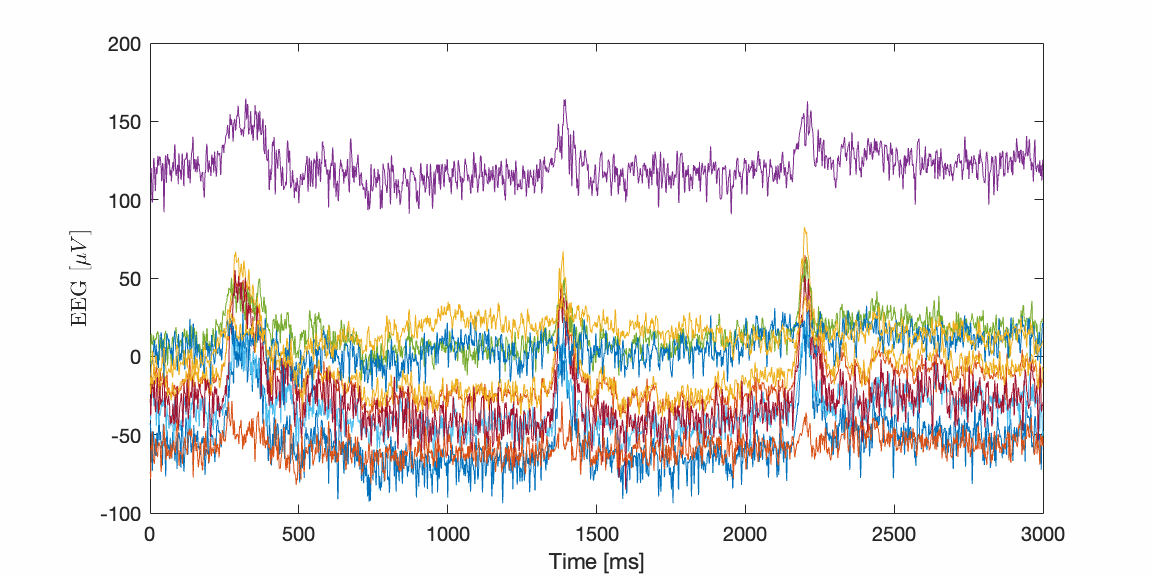

In [ ]:
plot(data(1:10,1:3000)' * 1e6)

set(gcf, 'Units', 'inches');
screenPosition = get(gcf, 'Position');
set(gcf, 'Position', [screenPosition(1), screenPosition(2), 8, 4]);
ylabel('EEG [${\mu V}$]', 'Interpreter','latex')
xlabel('Time [ms]')

## Compute power from Morlet Wavelets

In [ ]:
help("ro_freq_meeglet")

  meeglet (ver 1.0)
  Denis Engemann & Jörg Hipp, Feb 2024
 
  Log-spaced frequency transform using Morlet wavelets for continous
  electrophysiological signals. Derive power, covariance and various
  conncetivity metrics
 
  % Input
  - dat ... [channels x samples], set invalid data sections to NaN;
            Input signal needs to have in µV
  - cfg ... struct, see script itself for default parameters, cfg.fsample
            has to be set by the user
  
  % Output
  Metrics indicated in cfg.output (default: all)
  Values returned as fields in struct out:
  - foi .. frequencies for which below metrics are derived in Hz
  - n .. number of time-windows used to compute below metrics
  - cfg .. the cfg struct containing all parameters
  - unit .. unit of the power spectral density (pow)
  - pow .. Power spectrum. The total power in µV² for a channel (ich) over
           the frequency range [cfg.f_start,cfg.f_end] can be derived as:
           if cfg.density is 'linear'         -> total

In [ ]:
cfg.fsample = raw.info.sfreq;
cfg.output = {'pow'}

cfg = struct with fields:
    fsample: 600.6150
     output: {'pow'}

In [ ]:
out = ro_freq_meeglet(data * 1e6,cfg);

Morlet wavelet transform [.................................] 8.1 sec


In [ ]:
out

out = struct with fields:
           cfg: [1x1 struct]
           foi: [2 2.1810 2.3784 2.5937 2.8284 3.0844 3.3636 3.6680 4 4.3620 4.7568 5.1874 5.6569 6.1688 6.7272 7.3360 8 8.7241 9.5137 10.3747 11.3137 12.3377 13.4543 14.6721 16 17.4481 19.0273 20.7494 22.6274 24.6754 26.9087 29.3441 32]
           pow: [59x33 double]
       pow_var: [59x33 double]
          unit: 'µV²/oct'
    pow_median: [59x33 double]
       pow_geo: [59x33 double]
             n: [402 439 479 523 570 621 677 741 806 879 961 1046 1139 1241 1353 1473 1616 1752 1914 2082 2281 2486 2687 2923 3204 3472 3787 4167 4505 4902 5377 5748 6412]
            qt: 6.8624
        bw_oct: 0.5000

Plot log power and on log frequency grid

In [ ]:
log_foi = log2(out.foi);
log_pow_db = 10 * log10(out.pow);

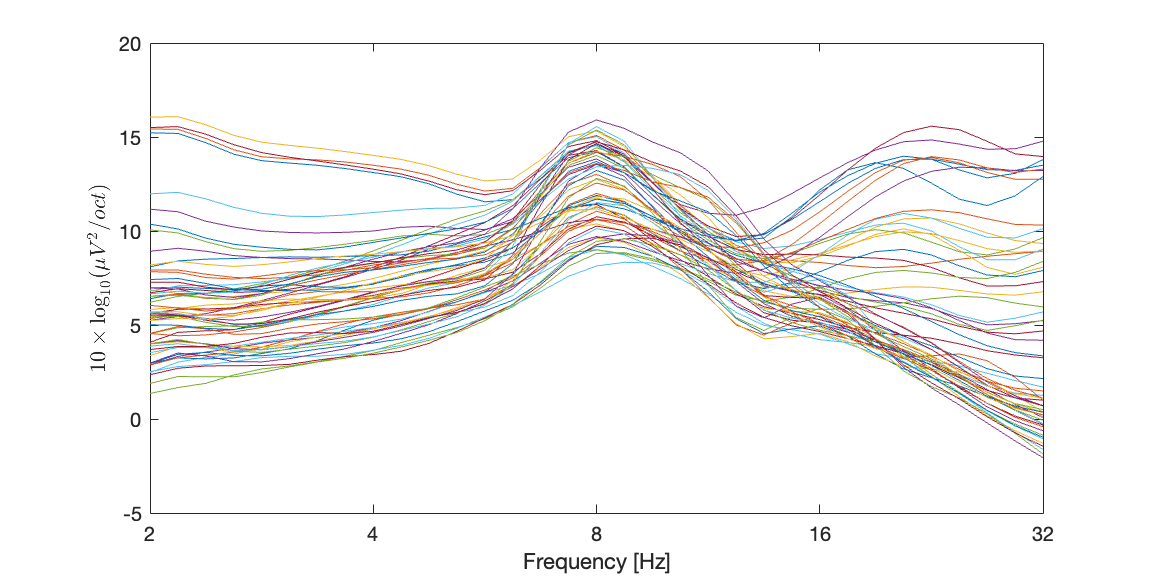

In [ ]:
plot(log_foi, log_pow_db')
xlabel('Frequency [Hz]')
xticks([1, 2, 3, 4, 5]);
xticklabels([2, 4, 8, 16, 32]);
ylabel('${10 \times \log_{10}(\mu V ^ 2 / oct)}$','Interpreter','Latex')

set(gcf, 'Units', 'inches');
screenPosition = get(gcf, 'Position');
set(gcf, 'Position', [screenPosition(1), screenPosition(2), 8, 4]);